In [1]:
# Import required packages
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import matplotlib as mpl
import numpy as np
import pandas as pd
from pylab import cm

### Load global data from JHU repository

In [2]:
# Filenames of JHU data
filename_confirmed = 'C:\\Users\\LENOVO\\Desktop\\New folder\\time_series_covid19_confirmed_global.csv'
filename_recovered = 'C:\\Users\\LENOVO\\Desktop\\New folder\\time_series_covid19_recovered_global.csv'
filename_deaths =    'C:\\Users\\LENOVO\\Desktop\\New folder\\time_series_covid19_deaths_global.csv'

In [3]:
# Open JHU data files
data_confirmed = pd.read_csv(filename_confirmed)
data_recovered = pd.read_csv(filename_recovered)
data_deaths = pd.read_csv(filename_deaths)

In [4]:
# Edit certain country names for aesthetics
for i in [data_confirmed, data_recovered, data_deaths]:
    i.loc[i['Country/Region'] == 'Korea, South', 'Country/Region'] = 'S. Korea'
    i.loc[i['Country/Region'] == 'US', 'Country/Region'] = 'USA'
    i.loc[i['Country/Region'] == 'United Kingdom', 'Country/Region'] = 'UK'

### Function covidData to extract data for specific countries
#covidData(country, output=1, start=100)
#country – string representing country of interest
#output – Type of output desired (1 for confirmed cases, 2 for recovered cases, 3 for deaths, and 4 for net cases – default 1)
#start – Return data starting at the nth case, represented by value of start – default 100

In [5]:
def covidData(country, output=1, start=100):
    
    data_conf = data_confirmed[data_confirmed['Country/Region'] == country].loc[:, '1/22/20':].sum(axis=0)
    data_rec = data_recovered[data_recovered['Country/Region'] == country].loc[:, '1/22/20':].sum(axis=0)
    data_dea = data_deaths[data_deaths['Country/Region'] == country].loc[:, '1/22/20':].sum(axis=0)
    
    # Find first non-zero index to get day 0 (first confirmed case)
    day0 = -1
    for i in range(len(data_conf)):
        if output == 1 or output == 4:
            if data_conf[i] >= start:
                day0 = i
                break
        elif output == 2:
            if data_rec[i] >= start:
                day0 = i
                break
        else:
            if data_dea[i] >= start:
                day0 = i
                break
    if day0 == -1:
        return []
    
    # If output is 1 (confirmed), return aggregate confirmed cases
    if output == 1:
        return data_conf[day0:]
    
    # If output is 2 (recovered), return aggregate recovered cases
    if output == 2:
        return data_rec[day0:]
    
    # If output is 3 (deaths), return aggregate deaths
    if output == 3:
        return data_dea[day0:]
    
    # If output is 4 (net), return the net number of cases
    if output == 4:
        data_output = (data_conf.subtract(data_rec)).subtract(data_dea)
        return data_output[day0:]

## Confirmed Cases

### Load confirmed case data for different countries
highlighted_countries – highlighted countries that are shown as color traces with labels

In [6]:
# Confirmed cases

# Load all country names into a list
countries = []
for i in data_confirmed['Country/Region']:
    if i not in countries:
        countries.append(i)

# List of country names to highlight in the plot
highlighted_countries = ['USA', 'UK', 'Italy', 'Japan', 'S. Korea', 'India', 
                         'Germany', 'Australia', 'Iran', 'Singapore', 'Brazil', 'Sweden']

### General Plot Parameters

In [7]:
# Font properties
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 24

# Axes properties
mpl.rcParams['axes.linewidth'] = 0
mpl.rcParams['axes.facecolor'] = '#ededed'
mpl.rcParams['axes.labelpad'] = 10

# Tick properties
mpl.rcParams['xtick.major.pad'] = 10
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['xtick.minor.size'] = 0
mpl.rcParams['ytick.major.pad'] = 10
mpl.rcParams['ytick.major.size'] = 0
mpl.rcParams['ytick.minor.size'] = 0

# Line properties
mpl.rcParams['lines.solid_capstyle'] = 'round'

### Plot confirmed cases – starting at 1000th case

findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


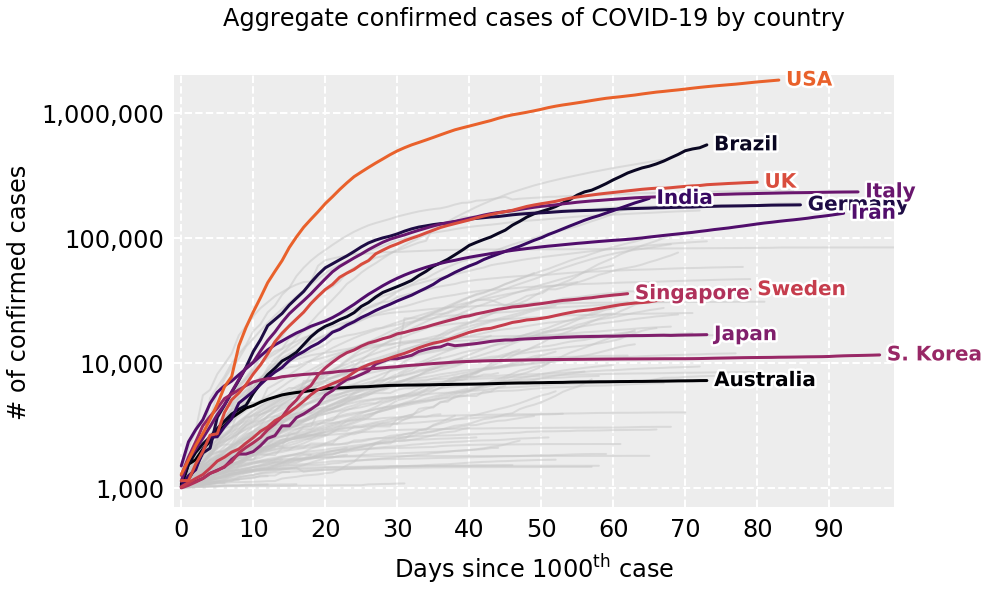

In [8]:
# Plot of confirmed cases

# Generate list of colors from 'inferno' colormap for highlighted countries and a color for the background countries
colors = cm.get_cmap('inferno', int(1.5*len(highlighted_countries)))
color_bg = '#c6c6c6'

# Create figure and axes
fig = plt.figure(figsize=(10,6), facecolor='white')
ax = fig.add_axes([0, 0, 1, 1])

# Set y-axis scale to logarithmic
ax.set_yscale('log')

# Add grid for readability of logarithmic axes
ax.grid(color='white', linewidth=2, linestyle='--', zorder=1)

# Range of plot (x-axis and y-axis)
x_max = 96 # Days
y_max = 2*10**6 # Cases

# Padding for text labels
left_pad = 0

# Remove increase section since most curves have flattened
# Lines for exponential increase (edit rate as desired)
rate = [] # percent change per day (list of values for plot)

for i in rate:
    increase_line = [1000]
    total_cases = 1000
    
    while len(increase_line) < x_max and total_cases < y_max:
        total_cases *= (1 + i/100.0)
        increase_line.append(total_cases)

    ax.plot(np.arange(0, len(increase_line), 1), increase_line, linewidth=2, linestyle='--', color='black', alpha=0.3, zorder=2)
    increase_label = ax.text(len(increase_line) - 0.5, increase_line[-1], str(i) + '% Daily', size=20, color='black', ha='left', va='center', alpha=0.3)

# Colors for highlighted countries
colorCounter = 0

# Whether to show non-highlighted countries in the background
showBackground = True

# Plot confirmed cases for different countries (if showBackground is True the plot non-highlighted countries in semitransparent gray)
for i in countries:
    data = covidData(i, 1, 1000)
    if i in highlighted_countries and len(data) > 0:
        ax.plot(np.arange(0, len(data), 1), data, linewidth=3, color=colors(colorCounter), zorder=3)
        text = ax.text(len(data) + left_pad, data[-1], i, size=20, weight='bold', ha='left', va='center', color=colors(colorCounter))
        text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])
        colorCounter += 1
    elif len(data) > 0 and showBackground:
        ax.plot(np.arange(0, len(data), 1), data, linewidth=2, color=color_bg, alpha=0.5, zorder=2)

# Set x-axis tick intervals
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))

# Set y-axis tick intervals and labels
ax.set_yticks([1000, 10000, 100000, 1000000])
ax.set_yticklabels(['1,000', '10,000', '100,000', '1,000,000'])

# Set x and y-axis labels
ax.set_xlabel(u'Days since 1000$\mathregular{^{th}}$ case')
ax.set_ylabel('# of confirmed cases')

# Set axis limits
ax.set_xlim(-1, x_max + 3)
ax.set_ylim(700, y_max)

# Title
ax.set_title('Aggregate confirmed cases of COVID-19 by country', size=24, pad=50)

# Save plot (comment/uncomment as desired)
dpi = 300 # Resolution of image
plt.savefig('covid-cases.png', dpi=dpi, bbox_inches='tight')

# Show plot
plt.show()


### Plot deaths – starting at 10th death

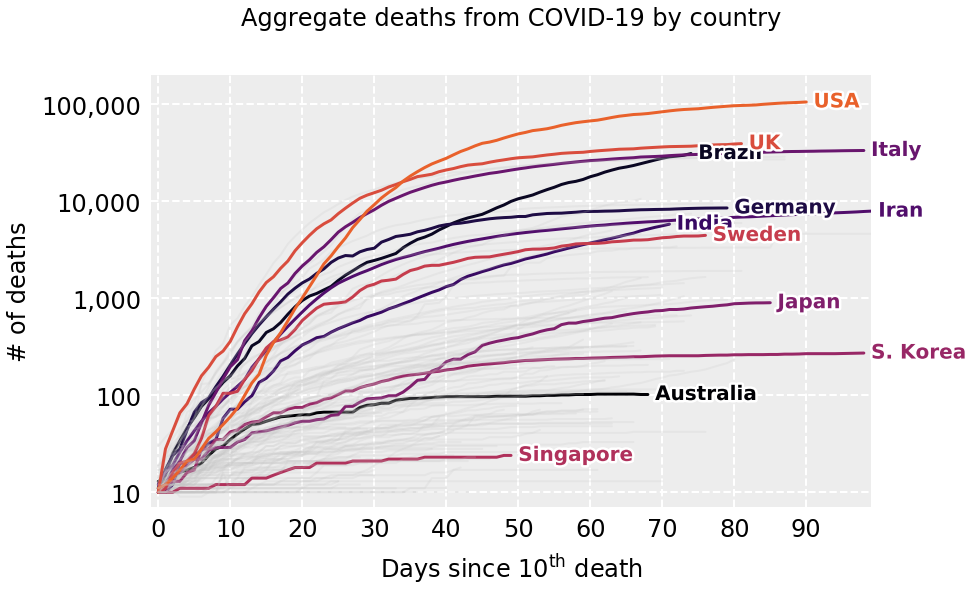

In [9]:
# Plot of deaths

# Generate list of colors from 'inferno' colormap for highlighted countries and a color for the background countries
colors = cm.get_cmap('inferno', int(1.5*len(highlighted_countries)))
color_bg = '#c6c6c6'

# Create figure and axes
fig = plt.figure(figsize=(10, 6), facecolor='white')
ax = fig.add_axes([0, 0, 1, 1])

# Set y-axis scale to logarithmic
ax.set_yscale('log')

# Add grid for readability of logarithmic axes
ax.grid(color='white', linewidth=2, linestyle='--', zorder=1)

# Range of plot (x-axis and y-axis)
x_max = 96 # Days
y_max = 2*10**5 # Cases

# Padding for text labels
left_pad = 0

# Lines for exponential increase (edit rate as desired)
rate = [] # percent change per day (list of values for plot)

for i in rate:
    increase_line = [10]
    total_cases = 10
    
    while len(increase_line) < x_max and total_cases < y_max:
        total_cases *= (1 + i/100.0)
        increase_line.append(total_cases)

    ax.plot(np.arange(0, len(increase_line), 1), increase_line, linewidth=2, linestyle='--', color='black', alpha=0.3)
    increase_label = ax.text(len(increase_line) - 0.5, increase_line[-1], str(i) + '% Daily', size=20, color='black', ha='left', va='center', alpha=0.3)

# Colors for highlighted countries
colorCounter = 0

# Whether to show non-highlighted countries in the background
showBackground = True

# Plot confirmed cases for different countries (if showBackground is True the plot non-highlighted countries in semitransparent gray)
for i in countries:
    data = covidData(i, 3, 10)
    if len(data) == 0:
        continue
    if i in highlighted_countries:
        ax.plot(np.arange(0, len(data), 1), data, linewidth=3, color=colors(colorCounter), zorder=2)
        text = ax.text(len(data) + left_pad, data[-1], i, size=20, weight='bold', ha='left', va='center', color=colors(colorCounter))
        text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])
        colorCounter += 1
    elif showBackground:
        ax.plot(np.arange(0, len(data), 1), data, linewidth=2, color=color_bg, alpha=0.2, zorder=2)    

# Set x-axis tick intervals
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))

# Set y-axis tick intervals and labels
ax.set_yticks([10, 100, 1000, 10000, 100000])
ax.set_yticklabels(['10', '100', '1,000', '10,000', '100,000'])

# Set x and y-axis labels
ax.set_xlabel(u'Days since 10$\mathregular{^{th}}$ death', labelpad=10)
ax.set_ylabel('# of deaths', labelpad=10)

# Set axis limits
ax.set_xlim(-1, x_max + 3)
ax.set_ylim(7, y_max)

# Title
ax.set_title('Aggregate deaths from COVID-19 by country', size=24, pad=50)

# Save plot (comment/uncomment as desired)
dpi = 300 # Resolution of image
plt.savefig('covid-deaths.png', dpi=dpi, bbox_inches='tight')

# Show plot
plt.show()


### Plot open cases – starting at 100th case

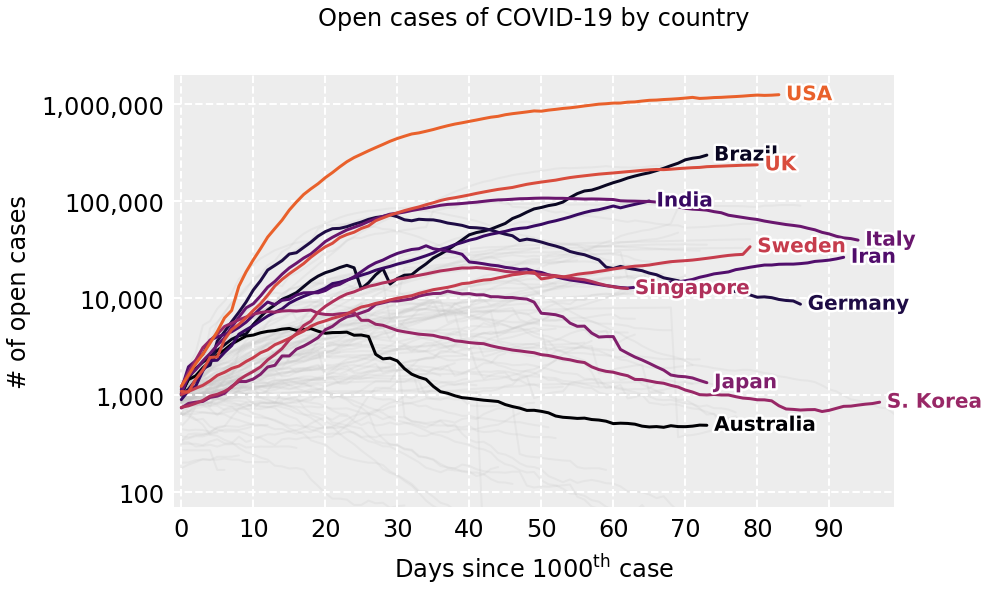

In [10]:
# Plot of open cases

# Generate list of colors from 'inferno' colormap for highlighted countries and a color for the background countries
colors = cm.get_cmap('inferno', int(1.5*len(highlighted_countries)))
color_bg = '#c6c6c6'

# Create figure and axes
fig = plt.figure(figsize=(10,6), facecolor='white')
ax = fig.add_axes([0, 0, 1, 1])

# Set y-axis scale to logarithmic
ax.set_yscale('log')

# Add grid for readability of logarithmic axes
ax.grid(color='white', linewidth=2, linestyle='--')

# Range of plot (x-axis and y-axis)
x_max = 96 # Days
y_max = 2*10**6 # Cases

# Padding for text labels
left_pad = 0

# Lines for exponential increase (edit rate as desired)
rate = [] # percent change per day (list of values for plot)

for i in rate:
    increase_line = [100]
    total_cases = 100
    
    while len(increase_line) <= x_max and total_cases < y_max:
        total_cases *= (1 + i/100.0)
        increase_line.append(total_cases)

    ax.plot(np.arange(0, len(increase_line), 1), increase_line, linewidth=2, linestyle='--', color='black', alpha=0.3)
    increase_label = ax.text(len(increase_line) - 0.5, increase_line[-1], str(i) + '% Daily', size=20, color='black', ha='left', va='center', alpha=0.3)

# Colors for highlighted countries
colorCounter = 0

# Whether to show non-highlighted countries in the background
showBackground = True

# Plot confirmed cases for different countries (if showBackground is True the plot non-highlighted countries in semitransparent gray)
for i in countries:
    data = covidData(i, 4, 1000)
    if i in highlighted_countries and len(data) > 0:
        ax.plot(np.arange(0, len(data), 1), data, linewidth=3, color=colors(colorCounter), zorder=2)
        text = ax.text(len(data) + left_pad, data[-1], i, size=20, weight='bold', ha='left', va='center', color=colors(colorCounter))
        text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])
        colorCounter += 1
    elif len(data) > 0 and showBackground:
        ax.plot(np.arange(0, len(data), 1), data, linewidth=2, color=color_bg, alpha=0.2, zorder=1)

# Set x-axis tick intervals
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))

# Set y-axis tick intervals and labels
ax.set_yticks([100, 1000, 10000, 100000, 1000000])
ax.set_yticklabels(['100', '1,000', '10,000', '100,000', '1,000,000'])

# Set x and y-axis labels
ax.set_xlabel(u'Days since 1000$\mathregular{^{th}}$ case', labelpad=10)
ax.set_ylabel('# of open cases', labelpad=10)

# Set axis limits
ax.set_xlim(-1, x_max + 3)
ax.set_ylim(70, y_max)

# Title
ax.set_title('Open cases of COVID-19 by country', size=24, pad=50)

# Save plot (comment/uncomment as desired)
dpi = 300 # Resolution of image
plt.savefig('covid-net-cases.png', dpi=dpi, bbox_inches='tight')

# Show plot
plt.show()


## Case doubling rate

### Function doubling_rate to determine rate at which cases double
#doubling_rate(country, output=1)
#country string representing Country of interest
#output Type of output desired (1 for confirmed cases, 2 for recovered cases, and 3 for deaths – default 1)

In [14]:
def doubling_rate(country, output=1):
    
    data_conf = data_confirmed[data_confirmed['Country/Region'] == country].loc[:, '1/22/20':].sum(axis=0)
    data_rec = data_recovered[data_recovered['Country/Region'] == country].loc[:, '1/22/20':].sum(axis=0)
    data_dea = data_deaths[data_deaths['Country/Region'] == country].loc[:, '1/22/20':].sum(axis=0)
    
    # If output is 1 (confirmed), return aggregate confirmed cases
    if output == 1:
        current_cases = data_conf[-1]
        
        # Most recent doubling
        for i in range(2, len(data_conf) + 1):
            if 2*data_conf[-i] <= current_cases:
                doubling_event = i - 1
                break
        
        # Instantaneous doubling rate
        change = np.sqrt(current_cases/data_conf[-3]) - 1
        
        # Return instantaneous rate and most recent doubling
        return np.log(2)/np.log(1 + change), doubling_event
    
    # If output is 2 (recovered), return aggregate recovered cases
    if output == 2:
        current_cases = data_rec[-1]
        
        # Most recent doubling
        for i in range(2, len(data_rec) + 1):
            if 2*data_rec[-i] <= current_cases:
                doubling_event = i - 1
                break
        
        # Instantaneous doubling rate
        change = np.sqrt(current_cases/data_rec[-3]) - 1
        
        # Return instantaneous rate and most recent doubling
        return np.log(2)/np.log(1 + change), doubling_event
    
    # If output is 3 (deaths), return aggregate deaths
    if output == 3:
        current_cases = data_dea[-1]
        
        # Most recent doubling
        for i in range(2, len(data_dea) + 1):
            if 2*data_dea[-i] <= current_cases:
                doubling_event = i - 1
                break
        
        # Instantaneous doubling rate
        change = np.sqrt(current_cases/data_dea[-3]) - 1
        
        # Return instantaneous rate and most recent doubling
        if change == 0:
            return 0, doubling_event
        else:
            return np.log(2)/np.log(1 + change), doubling_event

### List of countries to plot case doubling rate

In [15]:
countries = ['USA', 'UK', 'Italy', 'S. Korea', 'Japan', 'Australia', 'India', 'Germany', 'Iran', 'Sweden', 'Brazil']

### Plot horizontal bar chart of doubling rates of cases

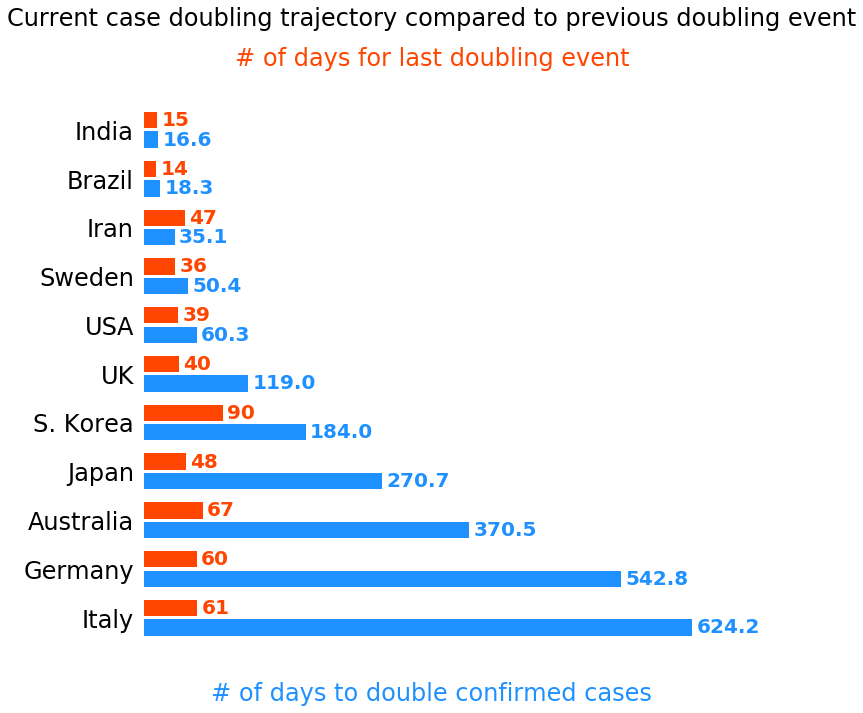

In [16]:
# Plot of doubling rate of cases

fig = plt.figure(figsize=(8,8), facecolor='white')
ax = fig.add_axes([0, 0, 1, 1], facecolor='white')
ax2 = ax.twiny()

# Get doubling rate data
double_rate = []
double_event = []
for i in countries:
    double_rate.append(doubling_rate(i, 1)[0])
    double_event.append(doubling_rate(i, 1)[1])
    
# Sort the doubling rates from shortest to longest
countries = [x for _, x in sorted(zip(double_rate, countries), reverse=True)]
double_event = [x for _, x in sorted(zip(double_rate, double_event), reverse=True)]
double_rate = sorted(double_rate, reverse=True)

offset = 1.2
double_rate_y = np.arange(0, 3*len(countries), 3)
double_event_y = np.arange(offset, 3*len(countries) + 1, 3)

# Plot horizontal bars for doubling rates
ax.barh(double_rate_y, double_rate, height=1, align='center', color='#1e90ff')
ax.barh(double_event_y, double_event, height=1, align='center', color='#ff4500')

# Places labels for the doubling rates
padding = 5
for i in range(len(countries)):
    ax.text(double_rate[i] + padding, double_rate_y[i], str(round(double_rate[i], 1)), size=20, weight='bold', color='#1e90ff', ha='left', va='center')
    ax.text(double_event[i] + padding, double_event_y[i], str(round(double_event[i], 1)), size=20, weight='bold', color='#ff4500', ha='left', va='center')
    
# Remove x-tick labels
ax.xaxis.set_ticklabels([])
ax2.xaxis.set_ticklabels([])

# Set country names for y-tick labels
ax.set_yticks(double_rate_y + (offset/2))
ax.yaxis.set_ticklabels(countries)

# Set x-axis label
ax.set_xlabel('# of days to double confirmed cases', labelpad=10, color='#1e90ff')
ax2.set_xlabel('# of days for last doubling event', labelpad=10, color='#ff4500')

# Title
ax.set_title('Current case doubling trajectory compared to previous doubling event', size=24, pad=60)

# Save plot (comment/uncomment as desired)
dpi = 300 # Resolution of image
plt.savefig('case-doubling-rate.png', dpi=dpi, bbox_inches='tight')

plt.show()


### List of countries to plot case doubling rate

In [17]:
countries = ['USA', 'UK', 'Italy', 'Japan', 'Australia', 'S. Korea', 'India', 'Germany', 'Iran', 'Sweden', 'Brazil']

### Plot horizontal bar chart of doubling rates of deaths

findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


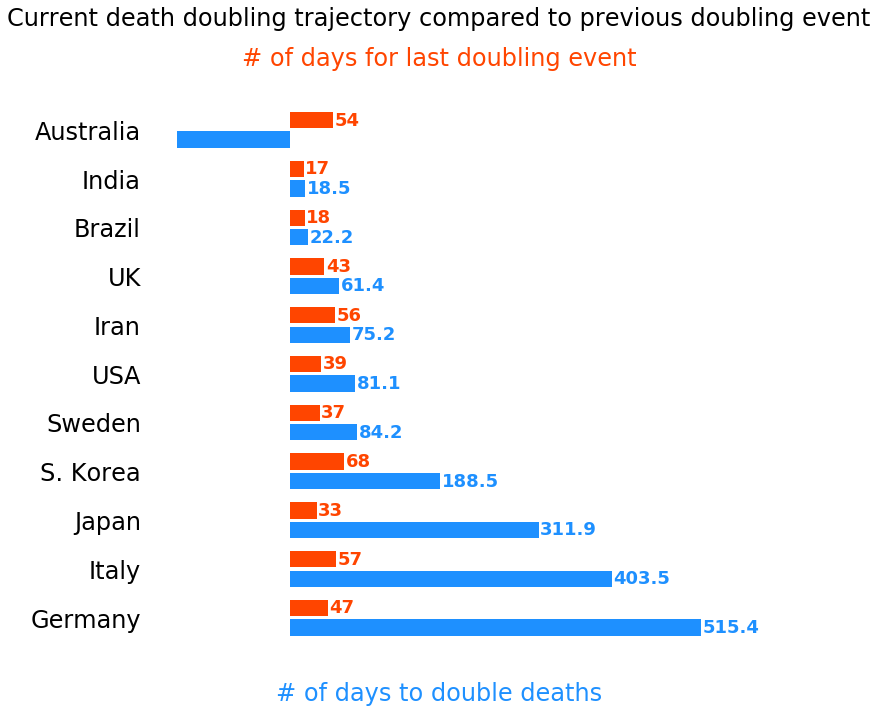

In [19]:
# Plot of doubling rate of deaths

fig = plt.figure(figsize=(8,8), facecolor='white')
ax = fig.add_axes([0, 0, 1, 1], facecolor='white')
ax2 = ax.twiny()

# Get doubling rate data
double_rate = []
double_event = []
for i in countries:
    double_rate.append(doubling_rate(i, 3)[0])
    double_event.append(doubling_rate(i, 3)[1])
    
# Sort the doubling rates from shortest to longest
countries = [x for _, x in sorted(zip(double_rate, countries), reverse=True)]
double_event = [x for _, x in sorted(zip(double_rate, double_event), reverse=True)]
double_rate = sorted(double_rate, reverse=True)

offset = 1.2
double_rate_y = np.arange(0, 3*len(countries), 3)
double_event_y = np.arange(offset, 3*len(countries) + 1, 3)

# Plot horizontal bars for doubling rates
ax.barh(double_rate_y, double_rate, height=1, align='center', color='#1e90ff')
ax.barh(double_event_y, double_event, height=1, align='center', color='#ff4500')

# Places labels for the doubling rates
padding = 2
for i in range(len(countries)):
    if double_rate[i] == 0:
        ax.text(padding, double_rate_y[i], 'No change in 3 days', size=18, weight='bold', color='#1e90ff', ha='left', va='center')
    else:
        ax.text(double_rate[i] + padding, double_rate_y[i], str(round(double_rate[i], 1)), size=18, weight='bold', color='#1e90ff', ha='left', va='center')
    ax.text(double_event[i] + padding, double_event_y[i], str(round(double_event[i], 1)), size=18, weight='bold', color='#ff4500', ha='left', va='center')
    
# Remove x-tick labels
ax.xaxis.set_ticklabels([])
ax2.xaxis.set_ticklabels([])

# Set country names for y-tick labels
ax.set_yticks(double_rate_y + (offset/2))
ax.yaxis.set_ticklabels(countries)

# Set x-axis label
ax.set_xlabel('# of days to double deaths', labelpad=10, color='#1e90ff')
ax2.set_xlabel('# of days for last doubling event', labelpad=10, color='#ff4500')

# Title
ax.set_title('Current death doubling trajectory compared to previous doubling event', size=24, pad=60)

# Save plot (comment/uncomment as desired)
dpi = 300 # Resolution of image
plt.savefig('death-doubling-rate.png', dpi=dpi, bbox_inches='tight')

plt.show()

### Load USA State Data

In [20]:
# JHU USA filenames
filename_us_confirmed = 'C:\\Users\\LENOVO\\Desktop\\New folder\\time_series_covid19_confirmed_US.csv'
filename_us_deaths =    'C:\\Users\\LENOVO\\Desktop\\New folder\\time_series_covid19_deaths_US.csv'

In [21]:
# Open JHU USA data
data_us_confirmed = pd.read_csv(filename_us_confirmed)
data_us_deaths = pd.read_csv(filename_us_deaths)

In [22]:
# Load all state names into a list
states = []
for i in data_us_confirmed['Province_State']:
    if i not in states:
        states.append(i)

# States to highlight in the plot
highlighted_states = ['California', 'Washington', 'New York', 'New Jersey', 'Michigan', 'Florida', 'Georgia']

In [23]:
# Dictionary for state abbreviations
state_abbr = {'Alabama':'AL', 'Alaska':'AK', 'Arizona':'AZ', 'Arkansas':'AR', 'California':'CA', 'Colorado':'CO', 
              'Connecticut': 'CT', 'Delaware':'DE', 'District of Columbia':'DC', 'Florida':'FL', 'Georgia':'GA', 
              'Hawaii':'HI', 'Idaho':'ID', 'Illinois':'IL', 'Indiana':'IN', 'Iowa':'IA', 'Kansas':'KS', 
              'Kentucky':'KY', 'Louisiana':'LA', 'Maine':'ME', 'Maryland':'MD', 'Massachusetts':'MA', 
              'Michigan':'MI', 'Minnesota':'MN', 'Mississippi':'MS', 'Missouri':'MO', 'Montana':'MT', 
              'Nebraska':'NE', 'Nevada':'NV', 'New Hampshire':'NH', 'New Jersey':'NJ', 'New Mexico':'NM', 
              'New York':'NY', 'North Carolina':'NC', 'North Dakota':'ND', 'Ohio':'OH', 'Oklahoma':'OK', 
              'Oregon':'OR', 'Pennsylvania':'PA', 'Rhode Island':'RI', 'South Carolina':'SC', 'South Dakota':'SD', 
              'Tennessee':'TN', 'Texas':'TX', 'Utah':'UT', 'Vermont':'VT', 'Virginia':'VA', 'Washington':'WA', 
              'West Virginia':'WV', 'Wisconsin':'WI', 'Wyoming':'WY'}

findfont: Font family ['Product Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Product Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Product Sans'] not found. Falling back to DejaVu Sans.


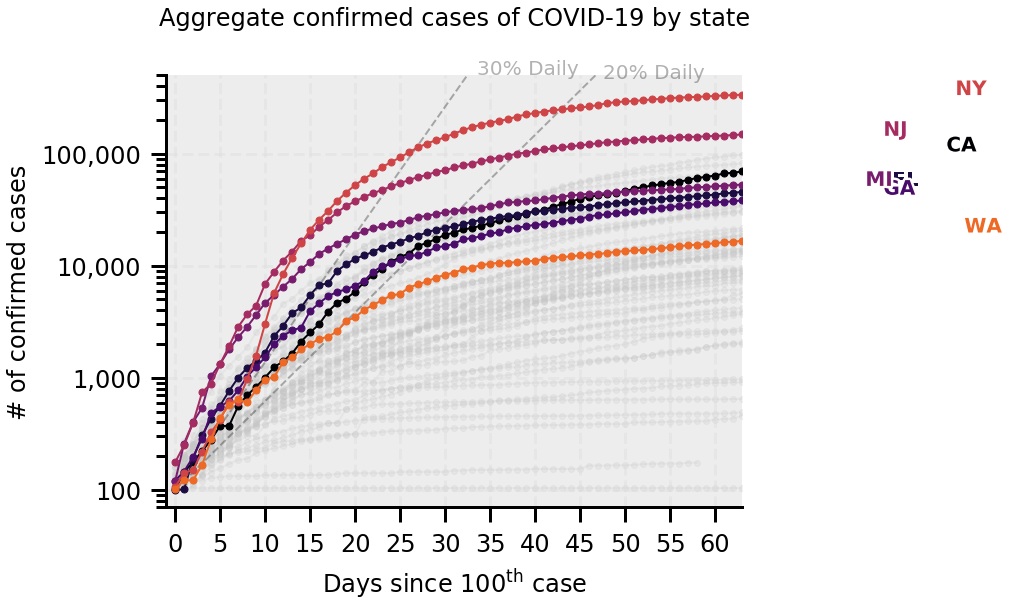

In [24]:
# Plot of confirmed cases

# Change font and axis parameters
mpl.rcParams['font.family'] = 'Product Sans'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['font.size'] = 24

# Generate list of colors from 'inferno' colormap for highlighted countries and a color for the background countries
colors = cm.get_cmap('inferno', int(1.5*len(highlighted_states)))
color_bg = '#c6c6c6'

# Create figure and axes
fig = plt.figure(figsize=(8,6), facecolor='white')
ax = fig.add_axes([0, 0, 1, 1])

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set y-axis scale to logarithmic
ax.set_yscale('log')

# Edit the tick lengths and thicknesses
ax.xaxis.set_tick_params(which='major', size=15, width=3)
ax.xaxis.set_tick_params(which='minor', size=10, width=3)
ax.yaxis.set_tick_params(which='major', size=15, width=3)
ax.yaxis.set_tick_params(which='minor', size=10, width=3)

# Add grid for readability of logarithmic axes
ax.grid(color='#d9d9d9', linewidth=3, linestyle='--', alpha=0.3)

# Range of plot (x-axis and y-axis)
x_max = 60 # Days
y_max = 5*10**5 # Cases

# Padding for text labels
left_pad = -0.3

# Lines for exponential increase (edit rate as desired)
rate = [20, 30] # percent change per day (list of values for plot)

for i in rate:
    increase_line = [100]
    total_cases = 100
    
    while len(increase_line) < x_max and total_cases < y_max:
        total_cases *= (1 + i/100.0)
        increase_line.append(total_cases)

    ax.plot(np.arange(0, len(increase_line), 1), increase_line, linewidth=2, linestyle='--', color='black', alpha=0.3)
    increase_label = ax.text(len(increase_line) - 0.5, increase_line[-1], str(i) + '% Daily', size=20, color='black', ha='left', va='center', alpha=0.3)

# Colors for highlighted countries
colorCounter = 0

# Whether to show non-highlighted countries in the background
showBackground = True

# Plot confirmed cases for different countries (if showBackground is True the plot non-highlighted countries in semitransparent gray)
for i in states:
    if i == 'Recovered':
        continue
    data = data_us_confirmed[data_us_confirmed['Province_State'] == i].loc[:, '1/22/20':].sum(axis=0)
    for j in range(len(data)):
        if data[j] >= 100:
            data = data[j:]
            break
    if i in highlighted_states:
        ax.plot(np.arange(0, len(data), 1), data, marker='o', ms=7, linewidth=2, color=colors(colorCounter), zorder=2)
        text = ax.text(len(data) + left_pad, data[-1], state_abbr[i], size=20, weight='bold', ha='left', va='center', color=colors(colorCounter))
        text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])
        colorCounter += 1
    elif showBackground:
        ax.plot(np.arange(0, len(data), 1), data, marker='o', linewidth=2, color=color_bg, alpha=0.2, zorder=1)

# Set x-axis tick intervals
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))

# Set y-axis tick intervals and labels
ax.set_yticks([100, 1000, 10000, 100000])
ax.set_yticklabels(['100', '1,000', '10,000', '100,000'])

# Set x and y-axis labels
ax.set_xlabel(u'Days since 100$\mathregular{^{th}}$ case', labelpad=10)
ax.set_ylabel('# of confirmed cases', labelpad=10)

# Set axis limits
ax.set_xlim(-1, x_max + 0.05*x_max)
ax.set_ylim(70, y_max)

# Title
ax.set_title('Aggregate confirmed cases of COVID-19 by state', size=24, pad=50)

# Save plot (comment/uncomment as desired)
dpi = 300 # Resolution of image
plt.savefig('covid-cases-states.png', dpi=dpi, bbox_inches='tight')

# Show plot
plt.show()


In [25]:
# Get California data
data_ca = data_us_confirmed[data_us_confirmed['Province_State'] == 'California']

# Load all county names into a list
counties = []
for i in data_ca['Admin2']:
    if i not in counties:
        counties.append(i)
        
# Counties to highlight in plot
highlighted_counties = ['Santa Clara', 'San Francisco', 'Santa Barbara', 'Los Angeles', 'Contra Costa', 'San Diego', 'Orange']

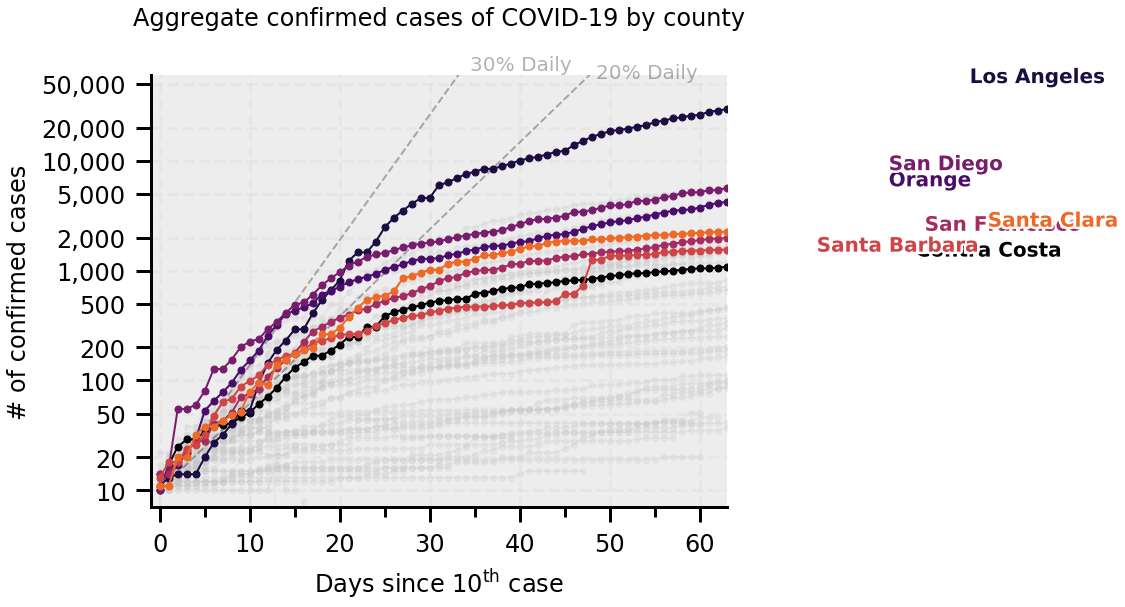

In [26]:
# Plot of confirmed cases

# Change font and axis parameters
mpl.rcParams['font.family'] = 'Product Sans'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['font.size'] = 24

# Generate list of colors from 'inferno' colormap for highlighted countries and a color for the background countries
colors = cm.get_cmap('inferno', int(1.5*len(highlighted_counties)))
color_bg = '#c6c6c6'

# Create figure and axes
fig = plt.figure(figsize=(8,6), facecolor='white')
ax = fig.add_axes([0, 0, 1, 1])

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set y-axis scale to logarithmic
ax.set_yscale('log')

# Edit the tick lengths and thicknesses
ax.xaxis.set_tick_params(which='major', size=15, width=3)
ax.xaxis.set_tick_params(which='minor', size=10, width=3)
ax.yaxis.set_tick_params(which='major', size=15, width=3)
ax.yaxis.set_tick_params(which='minor', size=0, width=3)

# Add grid for readability of logarithmic axes
ax.grid(color='#d9d9d9', linewidth=3, linestyle='--', alpha=0.3)

# Range of plot (x-axis and y-axis)
x_max = 60 # Days
y_max = 6*10**4 # Cases

# Padding for text labels
left_pad = 0

# Lines for exponential increase (edit rate as desired)
rate = [20, 30] # percent change per day (list of values for plot)

for i in rate:
    increase_line = [10]
    total_cases = 10
    
    while len(increase_line) < x_max and total_cases < y_max:
        total_cases *= (1 + i/100.0)
        increase_line.append(total_cases)

    ax.plot(np.arange(0, len(increase_line), 1), increase_line, linewidth=2, linestyle='--', color='black', alpha=0.3)
    increase_label = ax.text(len(increase_line) - 0.5, increase_line[-1], str(i) + '% Daily', size=20, color='black', ha='left', va='center', alpha=0.3)

# Colors for highlighted countries
colorCounter = 0

# Whether to show non-highlighted countries in the background
showBackground = True

# Plot confirmed cases for different countries (if showBackground is True the plot non-highlighted countries in semitransparent gray)
for i in counties:
    data = data_ca[data_ca['Admin2'] == i].loc[:, '1/22/20':].sum(axis=0)
    for j in range(len(data)):
        if data[j] >= 10:
            data = data[j:]
            break
    if i in highlighted_counties:
        ax.plot(np.arange(0, len(data), 1), data, marker='o', ms=7, linewidth=2, color=colors(colorCounter), zorder=2)
        if i == 'San Diego':
            text = ax.text(len(data) + left_pad, data[-1], i, size=20, weight='bold', ha='left', va='bottom', color=colors(colorCounter))
        else:
            text = ax.text(len(data) + left_pad, data[-1], i, size=20, weight='bold', ha='left', va='center', color=colors(colorCounter))
        text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])
        colorCounter += 1
    elif showBackground:
        ax.plot(np.arange(0, len(data), 1), data, marker='o', linewidth=2, color=color_bg, alpha=0.2, zorder=1)

# Set x-axis tick intervals
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))

# Set y-axis tick intervals and labels
ax.set_yticks([10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000])
ax.set_yticklabels(['10', '20', '50', '100', '200', '500', '1,000', '2,000', '5,000', '10,000', '20,000', '50,000'])

# Set x and y-axis labels
ax.set_xlabel(u'Days since 10$\mathregular{^{th}}$ case', labelpad=10)
ax.set_ylabel('# of confirmed cases', labelpad=10)

# Set axis limits
ax.set_xlim(-1, x_max + 0.05*x_max)
ax.set_ylim(7, y_max)

# Title
ax.set_title('Aggregate confirmed cases of COVID-19 by county', size=24, pad=50)

# Save plot (comment/uncomment as desired)
dpi = 300 # Resolution of image
plt.savefig('covid-cases-counties-ca.png', dpi=dpi, bbox_inches='tight')

# Show plot
plt.show()